<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">

<table style="border-collapse: collapse; border: none;">
<tr style="border: none;">
   <td> <img src="https://www.insurancejournal.com/app/uploads/2014/03/geico-580x361.jpg" alt="Data World" style="width: 450px;"/> </td>
    <td> <img src="https://careers.orbium.com/wp-content/uploads/2017/07/Artificial-Intelligence-in-Banking.jpg" alt="GEICO" style="width: 450px;"/> </td>  
    </tr>
    <tr style="border: none;">
    <td> Author: Liang Kuang </td>
    <td> kuangliangj@gmail.com</td>
    </tr>
</table>

# 1. Introduction
This mini-project is to build a predictive model for predicting whether a customer will make a call for payment and the business team can help them transit to make online payments.

# 2. Required Packages
In order to run the scripts, the following packages must be installed on python 3:

Packages:

* Python 3.5
* numpy
* pandas 0.18
* matplotlib
* time
* scikit-learn 0.18
* scipy
* seaborn
* datetime
* scipy
* imblearn
* xgboost
* keras

# 3. Input Data
* ./DS_MiniProject_ANON.csv <br>

The data has 130,086 rows with 29 features.

# 4. Results
* Logistic regression
* Random Forest
* Gradient Boosting Classifier
* Naive Bayer
* Neural Network
* Deep Net
* Outlier Detection
* SVC

# 5. Things to do
* Ideas with the date column:  <br>
 maybe it's too cold and internet interupt prone, call first etc. Create new feature to get month of year. Add weather data for that date.
* Turn more features engineering with less than 5 unique values to dummy variables. 
* Add more features, polynomial features etc.
* Try different deepnet architect with keras, tensor flow to get more complex hidden features.
* Try deep learning archetect for anomaly detection, e.g.: encoder-decoder for major and minor class seperately and choose threshold
* Try automated hyperparameter tuning framework for higher performance. <a href a='https://github.com/maxpumperla/hyperas'>hyperas </a>

In [102]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time
import pylab
import gc
import imblearn
from matplotlib.pylab import rcParams
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_columns = None

In [2]:
def dateparse(s):
    try:
        return pd.datetime.strptime(s,'%m/%d/%Y')
    except TypeError:
        return pd.NaT

In [3]:
raw = pd.read_csv('./DS_MiniProject_ANON.csv',parse_dates=['DATE_FOR'], date_parser=dateparse)
print("The shape of the data is %s"%str(raw.shape))
raw.head().T  # Transpose for a better view of the data

The shape of the data is (130086, 29)


,0,1,2,3,4
DATE_FOR,2014-05-19 00:00:00,2014-05-17 00:00:00,2014-05-15 00:00:00,2014-05-16 00:00:00,2014-05-20 00:00:00
RTD_ST_CD,ST_S0,ST_S0,ST_S0,ST_S1,ST_S0
CustomerSegment,1,1,1,1,1
Tenure,16.1752,15.9316,15.937,15.9343,15.5017
Age,78.4038,70.9897,87.5784,68.4381,80.5147
MART_STATUS,MS_S0,MS_S1,MS_S2,MS_S2,MS_S0
GENDER,F,F,M,M,F
CHANNEL1_6M,0,0,0,0,0
CHANNEL2_6M,0,6,0,0,0
CHANNEL3_6M,1,0,10,1,1


In [4]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,130086.0,8.583048,7.297112,0.032854,3.249829,7.006160,11.610540,63.091034
Age,130086.0,48.842201,14.038089,16.689938,37.878166,49.147159,58.858316,99.348392
CHANNEL1_6M,129277.0,0.261810,1.092346,0.000000,0.000000,0.000000,0.000000,12.000000
CHANNEL2_6M,129277.0,0.948467,1.880123,0.000000,0.000000,0.000000,1.000000,53.000000
CHANNEL3_6M,129277.0,0.811652,1.824188,0.000000,0.000000,0.000000,0.000000,26.000000
CHANNEL4_6M,129277.0,0.401216,1.065413,0.000000,0.000000,0.000000,0.000000,18.000000
CHANNEL5_6M,129277.0,0.569823,1.628655,0.000000,0.000000,0.000000,0.000000,29.000000
METHOD1_6M,129277.0,1.834425,2.596754,0.000000,0.000000,0.000000,4.000000,53.000000
RECENT_PAYMENT,129277.0,0.105680,0.307429,0.000000,0.000000,0.000000,0.000000,1.000000
PAYMENTS_6M,129277.0,4.848333,2.027548,1.000000,4.000000,6.000000,6.000000,53.000000


# Data Prepration
Including but beyond:
* Inventory check (data types, categorical features, numerical features, text features)
* Mising data mark and visualization
* Missing data preprocessing (inputation or removal)
* Data type conversion (to categorical or not)

## Check data type and keep an inventory of numerical, date, text, categorical

In [5]:
raw.dtypes

DATE_FOR                 datetime64[ns]
RTD_ST_CD                        object
CustomerSegment                  object
Tenure                          float64
Age                             float64
MART_STATUS                      object
GENDER                           object
CHANNEL1_6M                     float64
CHANNEL2_6M                     float64
CHANNEL3_6M                     float64
CHANNEL4_6M                     float64
CHANNEL5_6M                     float64
METHOD1_6M                      float64
RECENT_PAYMENT                  float64
PAYMENTS_6M                     float64
CHANNEL1_3M                       int64
CHANNEL2_3M                       int64
CHANNEL3_3M                       int64
CHANNEL4_3M                       int64
CHANNEL5_3M                       int64
METHOD1_3M                        int64
PAYMENTS_3M                       int64
NOT_DI_3M                         int64
NOT_DI_6M                         int64
EVENT1_30_FLAG                    int64


In [6]:
dtypes = raw.dtypes
objColumns = [key for key in dict(dtypes) if dict(dtypes)[key] in ['object']]
intColumns = [key for key in dict(dtypes) if dict(dtypes)[key] in ['int64']]
# remove 'Call Flag' from the feature column dictionary
intColumns.remove('Call_Flag')
floatColumns = [key for key in dict(dtypes) if dict(dtypes)[key] in ['float64']]

In [7]:
columnDict = {'objColumns': objColumns,
             'intColumns': intColumns,
             'floatColumns': floatColumns,
             'DateColumn':['DATE_FOR'],
              'targetColumn':['Call_Flag']
             }

## Check missing data

In [8]:
# Drop duplicate before doing anything
raw_no_duplicate = raw.drop_duplicates()
print("There are %d row of duplicates in this data."%(raw.shape[0] - raw_no_duplicate.shape[0]))

There are 278 row of duplicates in this data.


In [9]:
#Check missing data
def check_missing(df):
    # dataframe for total count of missing for each column
    df_sum =pd.DataFrame(df.isnull().sum()).T
    # dataframe for any missing data for each column
    df_any =pd.DataFrame(df.isnull().any()).T 

    missing_stats_df = df_any.append(df_sum)
    missing_stats_df.index = ['Empty Exist','Count']

    for column in missing_stats_df.columns:
        if missing_stats_df[column][0] == True :
            print("There are missing value in column '%s': missing %d record, percentage %5.2f "%
                  (column,missing_stats_df.loc['Count',column],
                   missing_stats_df.loc['Count',column]/df.shape[0]))
    return missing_stats_df
missing_stats_df= check_missing(raw_no_duplicate)


There are missing value in column 'CHANNEL1_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL2_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL3_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL4_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL5_6M': missing 809 record, percentage  0.01 
There are missing value in column 'METHOD1_6M': missing 809 record, percentage  0.01 
There are missing value in column 'RECENT_PAYMENT': missing 809 record, percentage  0.01 
There are missing value in column 'PAYMENTS_6M': missing 809 record, percentage  0.01 


### As seen above, there are 1% data missing for 7 feature columns. Based on early data explorization, it seems a lot the columns have very small set of unique values. And there is no missing data for the target variable. Let's drop the missing data for now as it won't impact the results much. Next, let's look at the dispersion of the numerical features. Integer to float.

In [10]:
# Drop missing values
raw_no_duplicate_no_missing = raw_no_duplicate.dropna()
check_missing(raw_no_duplicate_no_missing)

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
Empty Exist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#Check the data
month = raw_no_duplicate['DATE_FOR'].dt.month.unique()
print(month)
year = raw_no_duplicate['DATE_FOR'].dt.year.unique()
print(year)

[5]
[2014]


## Check the uniqueness and extreme values of the numerical features, particularly integer columns. 
As seen below, all the interger columns can be treated as categorical features since there are very small amount of labels with maximum of 45 values. Based on initial data check with raw.head(), I can see that the object features have at least more than 1 value. I'll skip the programming way of check. 

In [12]:
# I'll go with simple one first, value counts
columnWithConstant = []
for col in columnDict['intColumns']:
    cnts = pd.DataFrame(raw_no_duplicate_no_missing[col].value_counts())
    if(len(cnts.index)) == 1:
        columnWithConstant.append(col)
    display(cnts.T)
print("Column with constant values (to be removed) is %s"%str(columnWithConstant))

,3,2,1,0,4,5,6,7,8,9,10,12,13,11,16,21,14,17,18,36
PAYMENTS_3M,72773,17327,17115,12244,7000,1416,693,254,87,46,13,9,8,6,3,1,1,1,1,1


,0,1
NOT_DI_3M,121777,7222


,0,3,1,2,4,5,6,7,8,9,10,12,11,36,14,13
METHOD1_3M,82397,22908,10355,8518,3506,746,347,149,41,17,6,3,3,1,1,1


,0,1
POLICYPURCHASECHANNEL,112066,16933


,0,1,2,3,4,5,6,7,8,10
CHANNEL4_3M,112851,10096,3371,2264,297,68,40,6,5,1


,0,1
NOT_DI_6M,118617,10382


,0,3,1,2,4,5,6,7,36,11,8
CHANNEL2_3M,100663,12381,8680,6747,461,44,16,4,1,1,1


,0,3,1,2,4,5,6,7,8,13,11,10,9,16,14,12
CHANNEL5_3M,114048,8679,3074,2720,366,42,37,12,7,3,3,3,2,1,1,1


,0,3,1,2,4,5,6,7,16
CHANNEL3_3M,106508,12390,5349,4445,265,23,15,3,1


,0,1,2,3,4,5,6,7,8,9,16,10,15,17,11,14,18,12,13,19,20,21,23,24,22,25,27,28,30,29,32,31,33,44,26,41,42,43,45,37,35,34,38,36,40
LOGINS,75367,27242,13111,5939,2956,1473,805,491,300,161,125,123,109,94,76,74,73,68,58,56,52,29,28,24,22,16,12,12,12,11,11,10,10,9,8,5,5,4,4,3,3,3,2,2,1


,0
EVENT1_30_FLAG,128999


,0,3,1,2,4,5,6
CHANNEL1_3M,122884,2136,1773,1688,400,88,30


,0,1,2,3,4
EVENT2_90_SUM,110272,12896,5432,387,12


Column with constant values (to be removed) is ['EVENT1_30_FLAG']


## Check float columns to see whether we can convert it to categorical features.
As seen below, the only two columns that definitely shouldn't be converted are : 'Tenure' and 'Age'. Payment feature column is alread binary

In [13]:
# Check the float columns
for col in columnDict['floatColumns']:
    cnts = pd.DataFrame(raw_no_duplicate_no_missing[col].value_counts())
    if(len(cnts.index)) == 1:
        columnWithConstant.append(col)
    display(cnts.T)
print("Column with constant values (to be removed) is %s"%str(columnWithConstant))

,0.0,1.0,2.0,6.0,5.0,3.0,4.0,7.0,8.0,9.0,10.0,11.0,12.0
CHANNEL1_6M,119839,1656,1618,1508,1281,1261,1219,358,141,70,33,10,5


,6.0,5.0,4.0,1.0,3.0,2.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,26.0,23.0,19.0,21.0,22.0,24.0,20.0,29.0,27.0,53.0,33.0
PAYMENTS_6M,54306,18119,16787,13184,8075,7429,6654,1971,918,537,369,305,130,82,44,22,21,12,5,5,4,4,4,4,3,2,1,1,1


,0.0,6.0,1.0,5.0,4.0,2.0,3.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0,16.0,18.0,21.0,24.0,19.0,23.0,20.0,53.0
METHOD1_6M,72093,15794,11986,7258,5953,5868,4641,3063,1055,496,277,195,159,65,41,16,14,11,4,3,2,2,1,1,1


,0.0,1.0,2.0,3.0,4.0,6.0,5.0,7.0,8.0,9.0,10.0,12.0,11.0,14.0,13.0,18.0,17.0,15.0
CHANNEL4_6M,103046,14674,5244,2252,1376,1125,943,170,82,32,20,18,6,4,4,1,1,1


,0.0,6.0,5.0,4.0,1.0,3.0,2.0,7.0,8.0,12.0,9.0,11.0,10.0,13.0,14.0,23.0,18.0,24.0,17.0,26.0,25.0,29.0,16.0,15.0
CHANNEL5_6M,111842,5891,2667,2558,2477,1601,1438,364,57,27,21,16,13,6,6,3,2,2,2,2,1,1,1,1


,48.654346,55.638604,56.681725,58.045175,52.703628,39.687885,50.004107,41.409993,52.402464,53.352498,48.919918,49.46475,51.288159,50.072553,56.616016,51.559206,47.025325,44.150582,54.239562,53.445585,56.40794,51.33744,50.603696,53.574264,52.668036,51.739904,57.527721,52.969199,55.523614,50.688569,58.792608,50.707734,50.532512,53.549624,50.956879,47.627652,51.206023,63.028063,56.317591,52.780287,58.521561,51.671458,44.054757,57.284052,50.663929,38.86653,43.509925,50.053388,51.655031,49.842574,57.653662,47.734428,52.169747,51.800137,54.759754,45.516769,43.958932,58.57358,48.405202,51.901437,51.096509,54.724162,52.960986,54.600958,44.563997,53.667351,46.261465,51.37577,39.488022,36.640657,37.262149,34.806297,42.655715,52.807666,46.685832,60.542094,36.772074,35.882272,56.511978,49.902806,53.527721,53.653662,51.112936,55.230664,53.54141,51.657769,57.839836,55.531828,32.125941,58.360027,50.480493,43.422313,52.799452,62.863792,49.774127,55.857632,37.596167,59.359343,45.902806,58.8282,48.29295,51.709788,53.678303,50.110883,48.281999,50.398357,45.404517,55.715264,55.512663,46.965092,53.511294,55.616701,49.823409,57.412731,48.966461,51.23614,52.043806,53.078713,47.685147,50.045175,51.622177,53.637235,57.097878,44.676249,50.502396,46.488706,55.255305,52.457221,55.748118,55.466119,56.487337,54.581793,49.744011,58.683094,42.78987,56.468172,48.180698,52.54757,51.613963,53.650924,51.838467,42.710472,51.126626,31.950719,56.449008,49.034908,55.882272,48.81588,43.370294,56.654346,53.0705,48.62423,48.941821,52.164271,46.113621,39.748118,43.383984,51.561944,43.378508,43.101985,41.026694,36.952772,55.203285,50.406571,53.629021,45.746749,48.895277,58.90486,55.353867,64.128679,44.752909,53.913758,55.761807,64.848734,52.621492,51.225188,55.690623,58.836413,52.714579,47.071869,57.002053,54.617385,50.078029,49.505818,50.861054,55.611225,50.108145,56.136893,46.38193,57.793292,55.671458,52.238193,53.05681,55.290897,55.852156,44.769336,51.969884,32.13963,32.325804,55.909651,38.770705,34.436687,50.855578,56.243669,56.73922,51.028063,59.290897,49.514031,55.575633,55.613963,52.336756,53.300479,47.548255,53.806982,48.665298,39.386721,52.035592,43.942505,57.155373,47.901437,55.676934,54.926762,50.669405,43.756331,49.700205,44.449008,50.056126,48.70089,36.799452,42.403833,53.697467,54.721424,50.01232,55.047228,53.68104,55.657769,50.683094,53.429158,55.649555,50.748802,43.000684,30.814511,60.43258,48.035592,63.663244,50.770705,57.960301,43.507187,54.368241,51.411362,50.562628,46.313484,45.979466,56.347707,44.287474,50.540726,58.696783,52.996578,53.702943,38.811773,67.748118,44.531143,51.570157,36.947296,52.605065,53.522245,49.193703,51.696099,42.885695,45.136208,50.565366,46.3436,35.463381,54.850103,53.563313,36.832307,52.276523,41.697467,49.535934,49.905544,50.757016,34.130048,38.390144,53.262149,42.187543,48.47091,46.688569,49.289528,46.047912,30.570842,57.292266,49.10883,54.143737,42.55989,32.462697,43.373032,58.918549,56.602327,57.943874,53.69473,44.637919,55.70705,60.750171,47.523614,44.462697,38.732375,36.870637,50.543463,53.412731,55.972621,42.02601,52.845996,63.348392,54.833676,49.697467,49.577002,41.930185,48.728268,51.403149,57.913758,48.643395,32.010951,59.865845,45.546886,55.249829,49.390828,48.462697,54.609172,48.709103,30.209446,45.839836,53.790554,53.237509,37.73306,52.616016,47.983573,34.885695,57.182752,54.398357,50.286105,54.75154,65.623546,45.270363,56.232717,58.937714,60.25462,39.156742,51.039014,51.633128,53.83436,54.236824,47.258042,53.423682,40.164271,51.477071,55.307324,52.91718,56.747433,42.546201,50.527036,41.916496,54.874743,48.544832,54.510609,58.436687,53.686516,51.520876,49.472964,57.160849,52.36961,51.342916,49.68104,52.229979,52.429843,29.535934,44.577687,60.068446,51.56742,52.832307,57.801506,46.034223,51.441478,53.221081,56.720055,31.750856,42.735113,47.657769,51.463381,31.468857,44.654346,51.501711,49.314168,40.670773,54.546201,52.11499,58.442163,43.696099,45.837098,45.867214,34.258727,55.56742,47.619439,60.810404,61.40178,61.5

,0.0,6.0,1.0,5.0,4.0,3.0,2.0,7.0,8.0,9.0,10.0,12.0,11.0,26.0
CHANNEL3_6M,102624,8335,4866,3957,3751,2703,2490,215,23,16,9,7,2,1


,0.0,1.0
RECENT_PAYMENT,115355,13644


,0.50924,0.501027,0.511978,0.514716,0.517454,1.007529,0.520192,1.010267,1.01848,1.015743,1.514031,1.013005,0.087611,0.090349,0.093087,0.098563,2.015058,1.516769,0.506502,3.022587,3.019849,1.511294,0.095825,2.004107,3.011636,1.505818,3.008898,2.009582,3.509925,0.175222,2.006845,7.017112,3.00616,0.106776,3.518138,2.513347,0.186174,0.183436,7.008898,2.01232,6.9295,4.019165,5.516769,2.521561,0.681725,7.025325,4.514716,7.011636,0.503765,5.021218,6.516085,2.023272,6.937714,0.251882,6.518823,1.50308,2.507871,7.5154,3.025325,6.017796,0.260096,8.008214,7.014374,0.262834,2.510609,8.013689,7.104723,3.520876,6.940452,1.023956,8.005476,1.004791,6.009582,5.023956,3.507187,4.008214,6.603696,5.013005,7.00616,4.005476,1.185489,0.172485,0.19165,6.934976,5.514031,1.021218,8.021903,8.010951,6.672142,3.504449,6.020534,7.178645,5.015743,0.596851,5.511294,2.502396,3.18412,0.670773,1.103354,0.930869,1.180014,4.016427,1.678303,6.767967,6.01232,1.519507,5.935661,7.26078,1.259411,0.684463,5.500342,5.932923,9.007529,9.508556,7.512663,1.1718,8.511978,6.097194,2.020534,2.518823,3.017112,1.267625,5.938398,5.01848,1.601643,5.768652,3.173169,3.175907,2.187543,4.520192,4.024641,5.177276,6.354552,3.181383,5.50308,9.010267,0.922656,1.09514,7.504449,6.173854,2.017796,1.190965,2.184805,3.192334,6.688569,6.669405,6.187543,0.188912,1.188227,6.190281,1.352498,5.683778,1.092402,0.673511,7.186858,2.685832,7.189596,8.684463,8.501027,6.015058,6.683094,3.178645,1.182752,6.171116,8.50924,1.935661,0.605065,5.672827,0.588638,8.024641,3.014374,8.520192,1.264887,1.593429,5.763176,6.513347,1.256674,6.105407,2.934976,2.516085,5.941136,7.430527,6.507871,1.938398,5.519507,6.258727,9.021218,7.258042,7.088296,7.772758,1.106092,6.759754,3.268994,6.592745,5.924709,0.668036,2.099932,4.506502,7.436003,1.587953,7.682409,2.253251,0.265572,8.090349,6.765229,3.759069,2.924025,1.24846,7.59206,0.758385,3.099247,3.255305,7.263518,7.753593,6.762491,1.585216,6.182067,2.436687,1.68104,3.107461,4.021903,4.517454,5.760438,7.101985,5.686516,3.345654,2.932238,7.679671,5.675565,0.1013,6.685832,1.086927,8.769336,6.439425,6.587269,5.771389,9.01848,1.683778,7.605749,1.500342,1.927447,1.754962,0.761123,8.673511,5.670089,6.340862,6.932238,7.687885,2.091718,7.676934,3.676934,1.262149,7.266256,6.442163,5.185489,1.930185,6.680356,8.681725,1.431896,5.598905,0.5859,6.606434,9.7577,4.257358,8.506502,6.08898,7.589322,1.670089,7.764545,0.687201,7.509925,4.265572,7.022587,7.66872,3.258042,3.671458,6.3436,0.766598,6.590007,7.928816,5.188227,8.1013,0.769336,4.180698,1.089665,7.353867,4.673511,7.18412,6.844627,8.17796,7.255305,8.517454,6.184805,2.176591,0.180698,6.757016,7.340178,2.770705,6.855578,6.852841,9.174538,4.19165,0.594114,4.188912,7.520876,0.268309,0.939083,7.091034,0.336756,5.921971,1.686516,3.512663,4.503765,7.600274,8.260096,9.768652,2.677618,1.590691,1.604381,7.351129,9.670089,3.26078,6.431211,5.856263,8.25462,3.939767,6.600958,8.183436,6.841889,0.435318,2.9295,2.926762,6.335387,4.76386,4.104038,4.17796,7.093771,6.858316,7.181383,0.249144,7.433265,7.334702,7.759069,2.086242,1.429158,5.842574,6.269678,5.667351,4.175222,6.436687,4.172485,4.251882,2.94319,3.586585,3.096509,1.850787,7.685147,9.505818,7.518138,5.174538,2.773443,3.433265,9.50308,8.435318,6.433949,8.599589,3.682409,2.680356,2.255989,4.772074,0.933607,6.338125,8.772074,8.928131,8.019165,5.752225,8.180698,3.252567,1.333333,0.84052,3.756331,3.92334,1.667351,3.101985,9.1718,8.098563,6.264203,5.262149,6.091718,11.014374,0.76386,4.755647,3.605749,7.175907,8.175222,3.674196,6.26694,8.251882,9.182752,1.437372,9.177276,3.104723,9.672827,2.08898,4.268309,2.67488,0.854209,2.590007,7.926078,10.516085,8.5859,5.587953,5.092402,8.605065,7.342916,8.186174,7.019849,2.179329,6.261465,3.441478,8.755647,7.603012,7.756331,6.094456,2.433949,4.501027,4.093087,1.765914,0.845996,6.595483,2.182067,1.177276,2.603696,9.585216,1.338809,5.251198,3.942505,0.43258,8.588638,2.855578,6.250513,1.508556,9.004791,3.594798,8.678987,2.850103,3.427789,5.839836,7.838467,3.5154,5.10061

,0.0,1.0,6.0,4.0,5.0,2.0,3.0,7.0,8.0,11.0,9.0,10.0,12.0,53.0,13.0,17.0,23.0
CHANNEL2_6M,94616,8183,7711,5176,4774,4155,3980,312,46,12,12,12,6,1,1,1,1


Column with constant values (to be removed) is ['EVENT1_30_FLAG']


### Check the distribution of the columns with big vairations, ' age' and 'tenure'
The 'age' feature looks more like normal distributed and 'Tenure' is not. I'll do a transformation of the data, log and sqrt. It looks like using np.sqrt() can transform the data better. 

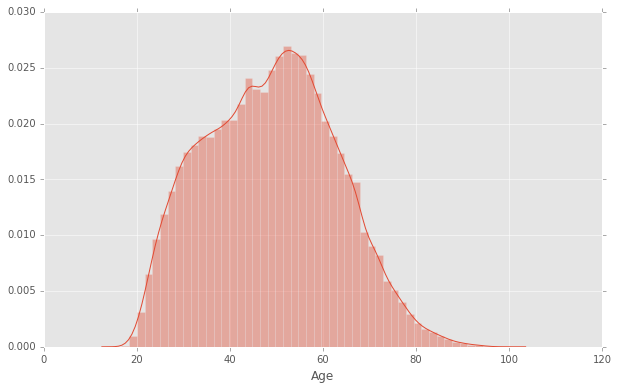

In [14]:
sns.distplot(raw_no_duplicate_no_missing.Age)

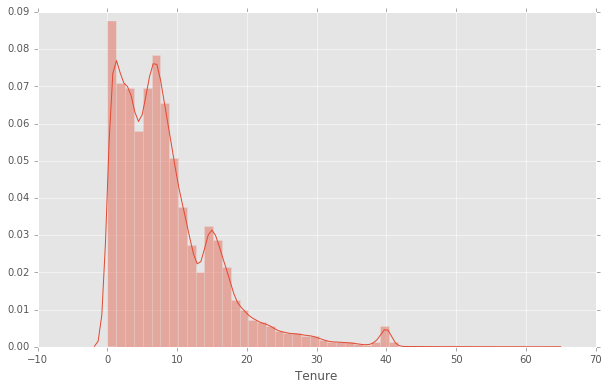

In [15]:
sns.distplot(raw_no_duplicate_no_missing.Tenure)

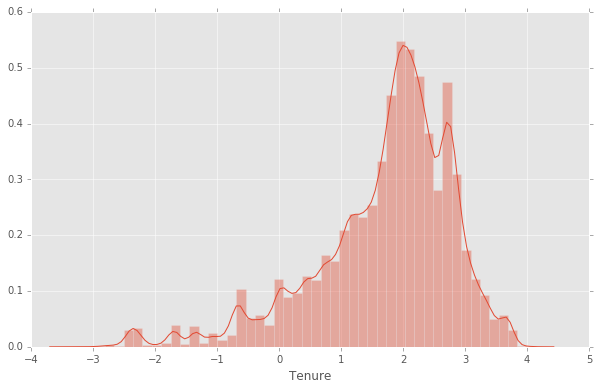

In [16]:
# look at the log transformation of 'Tenure' feature
sns.distplot(np.log(raw_no_duplicate_no_missing.Tenure))

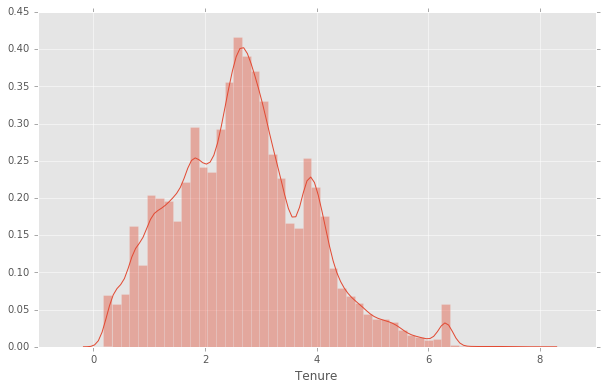

In [17]:
sns.distplot(np.sqrt(raw_no_duplicate_no_missing.Tenure))

In [18]:
raw_no_duplicate_no_missing['Tenure'] = np.sqrt(raw_no_duplicate_no_missing['Tenure']).tolist()

# Distribution of the target and feture columns. 
* First of all, check whether the target is balanced. 
* Secondly, check the distribution of the feature columns and see whether we need to do any feature transformation to make is quasi-uniform distributed to satisfy some Machine Learning algorithms.

In [19]:
raw_no_duplicate_no_missing.columns

Index(['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',
       'MART_STATUS', 'GENDER', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M',
       'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM', 'LOGINS',
       'POLICYPURCHASECHANNEL', 'Call_Flag'],
      dtype='object')

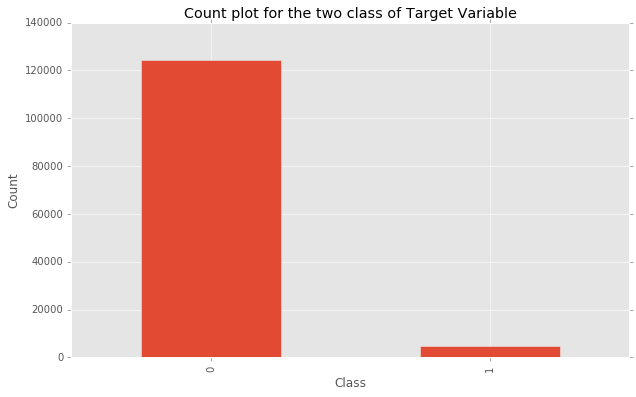

In [20]:
# distribution of target variable (call_flag)
ax = raw_no_duplicate_no_missing['Call_Flag'].value_counts().plot(kind='bar')
ax.set_title("Count plot for the two class of Target Variable")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

In [21]:
# Check distribution of feature variables, possible feature engineering
# 1. shorten labels for the features that will be converted to categorical
# 2. collinearity of all the numerical features besides the removed features (constant column)
# 3. visualization of the pair covariance

In [61]:
# Remove the constant features
raw_no_duplicate_no_constant_col = raw_no_duplicate_no_missing.drop(columnWithConstant, axis = 1)

In [62]:
# check the distribution for some features each class
calls = raw_no_duplicate_no_constant_col[raw_no_duplicate_no_constant_col['Call_Flag'] == 1]
noCalls = raw_no_duplicate_no_constant_col[raw_no_duplicate_no_constant_col['Call_Flag'] == 0]

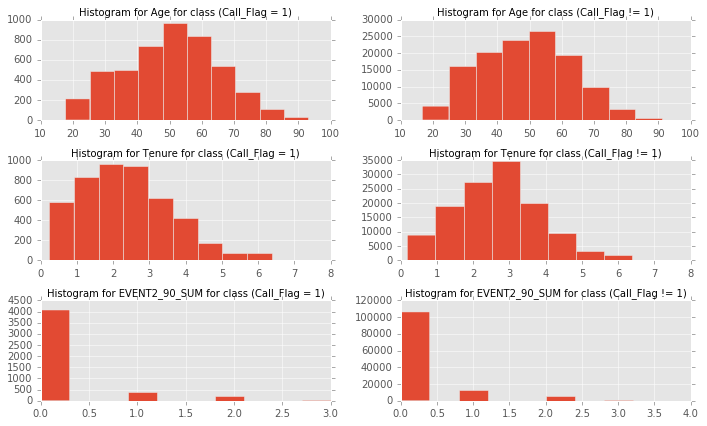

In [68]:
plt.subplot(321)
plt.hist(calls['Age']);
plt.title("Histogram for Age for class (Call_Flag = 1)", fontsize = 10)
plt.subplot(322)
plt.hist(noCalls['Age']);
plt.title("Histogram for Age for class (Call_Flag != 1)", fontsize = 10)
plt.subplot(323)
plt.hist(calls['Tenure']);
plt.title("Histogram for Tenure for class (Call_Flag = 1)", fontsize = 10)
plt.subplot(324)
plt.hist(noCalls['Tenure']);
plt.title("Histogram for Tenure for class (Call_Flag != 1)", fontsize = 10)
plt.subplot(325)
plt.hist(calls['EVENT2_90_SUM']);
plt.title("Histogram for EVENT2_90_SUM for class (Call_Flag = 1)", fontsize = 10)
plt.subplot(326)
plt.hist(noCalls['EVENT2_90_SUM']);
plt.title("Histogram for EVENT2_90_SUM for class (Call_Flag != 1)", fontsize = 10)
plt.tight_layout()

In [64]:
raw_no_duplicate_no_constant_col.dtypes

DATE_FOR                 datetime64[ns]
RTD_ST_CD                        object
CustomerSegment                  object
Tenure                          float64
Age                             float64
MART_STATUS                      object
GENDER                           object
CHANNEL1_6M                     float64
CHANNEL2_6M                     float64
CHANNEL3_6M                     float64
CHANNEL4_6M                     float64
CHANNEL5_6M                     float64
METHOD1_6M                      float64
RECENT_PAYMENT                  float64
PAYMENTS_6M                     float64
CHANNEL1_3M                       int64
CHANNEL2_3M                       int64
CHANNEL3_3M                       int64
CHANNEL4_3M                       int64
CHANNEL5_3M                       int64
METHOD1_3M                        int64
PAYMENTS_3M                       int64
NOT_DI_3M                         int64
NOT_DI_6M                         int64
EVENT2_90_SUM                     int64


In [24]:
columnDict = {'objColumns': objColumns,
             'intColumns': intColumns,
             'floatColumns': floatColumns,
             'DateColumn':['DATE_FOR'],
              'targetColumn':['Call_Flag']
             }


In [25]:
# update the intColumns after remove the 'EVENT1_30_FLAG'
intColumns.remove('EVENT1_30_FLAG')
columnDict['intColumns'] = intColumns

In [26]:
feature_col = columnDict['objColumns'] + columnDict['intColumns'] + columnDict['floatColumns']
numericalColumns = columnDict['intColumns'] + columnDict['floatColumns']

In [27]:
pd_corr = raw_no_duplicate_no_constant_col[feature_col].corr()  # tried a seaborn visualization but dont' creat much more value here
pd_corr

,PAYMENTS_3M,NOT_DI_3M,METHOD1_3M,POLICYPURCHASECHANNEL,CHANNEL4_3M,NOT_DI_6M,CHANNEL2_3M,CHANNEL5_3M,CHANNEL3_3M,LOGINS,CHANNEL1_3M,EVENT2_90_SUM,CHANNEL1_6M,PAYMENTS_6M,METHOD1_6M,CHANNEL4_6M,CHANNEL5_6M,Age,CHANNEL3_6M,RECENT_PAYMENT,Tenure,CHANNEL2_6M
PAYMENTS_3M,1.000000,0.199936,0.420494,-0.022584,0.177260,0.176030,0.204231,0.152408,0.139703,0.135602,0.258982,0.187238,0.243917,0.861563,0.331128,0.127102,0.112883,-0.078836,0.098614,0.206441,0.015789,0.151468
NOT_DI_3M,0.199936,1.000000,0.282058,0.117331,0.073829,0.823150,-0.081690,-0.072015,-0.093760,0.089921,0.826757,0.071904,0.803772,0.159377,0.258249,0.050862,-0.077498,-0.167015,-0.101512,0.052097,-0.233797,-0.093298
METHOD1_3M,0.420494,0.282058,1.000000,0.107961,0.228913,0.288385,0.176098,-0.202982,-0.261651,0.170670,0.326613,0.173141,0.332481,0.373620,0.943003,0.212778,-0.208125,-0.271110,-0.268024,0.122333,-0.251286,0.148684
POLICYPURCHASECHANNEL,-0.022584,0.117331,0.107961,1.000000,-0.057825,0.144908,-0.117065,-0.043382,-0.110323,0.135907,0.099899,0.025124,0.116205,-0.025022,0.116736,-0.070134,-0.044631,-0.182809,-0.114884,0.015080,-0.242546,-0.124821
CHANNEL4_3M,0.177260,0.073829,0.228913,-0.057825,1.000000,0.101574,0.005937,-0.096606,-0.110734,-0.078907,0.036834,0.197468,0.060746,0.129744,0.193873,0.876866,-0.098399,0.001973,-0.107620,0.086792,-0.085204,0.029201
NOT_DI_6M,0.176030,0.823150,0.288385,0.144908,0.101574,1.000000,-0.083542,-0.079412,-0.105128,0.107068,0.682619,0.141572,0.808248,0.190297,0.307010,0.079348,-0.087992,-0.198782,-0.115900,0.048360,-0.271119,-0.099826
CHANNEL2_3M,0.204231,-0.081690,0.176098,-0.117065,0.005937,-0.083542,1.000000,-0.150352,-0.178053,-0.184541,-0.069783,0.059857,-0.073527,0.182332,0.154283,0.051806,-0.153909,0.068119,-0.176670,0.068655,0.074081,0.949120
CHANNEL5_3M,0.152408,-0.072015,-0.202982,-0.043382,-0.096606,-0.079412,-0.150352,1.000000,-0.138143,-0.048031,-0.062006,-0.051861,-0.068643,0.139699,-0.210217,-0.106472,0.965931,0.030978,-0.141138,-0.017204,0.114386,-0.154956
CHANNEL3_3M,0.139703,-0.093760,-0.261651,-0.110323,-0.110734,-0.105128,-0.178053,-0.138143,1.000000,-0.172988,-0.080803,-0.078037,-0.090088,0.105841,-0.273708,-0.118379,-0.143120,0.251971,0.964885,-0.034247,0.132517,-0.183603
LOGINS,0.135602,0.089921,0.170670,0.135907,-0.078907,0.107068,-0.184541,-0.048031,-0.172988,1.000000,0.063521,0.082705,0.079407,0.135309,0.170541,-0.087327,-0.048709,-0.214514,-0.179612,0.085674,-0.095740,-0.191194


### As seen from the correlation for the numerical features, it seems CHANNEL[n]_1M is highly correlated to CHANNEL[n]_6M and method1_3m correlated to method1_6m.

In [28]:
# find the index (i,j) with correlation > a threshold (0.9)
coef_threshold = 0.9
corr_array = np.asarray(pd_corr)
[i_index, j_index] = np.where(np.abs(corr_array) > coef_threshold)


In [41]:
# remove the (i,i) pairs
index2keep = []
for ii in range(0,len(i_index)):
    if(i_index[ii] != j_index[ii]):
        index2keep.append(ii)
iList = i_index[index2keep]
jList = j_index[index2keep]
print(iList)
print(jList)
rmList = iList[0:int(len(iList)/2)]
features2remove = pd_corr.columns.values[rmList].tolist()

[ 2  6  7  8 10 12 14 16 18 21]
[14 21 16 18 12 10  2  7  8  6]


In [42]:
features2remove

['METHOD1_3M', 'CHANNEL2_3M', 'CHANNEL5_3M', 'CHANNEL3_3M', 'CHANNEL1_3M']

In [43]:
features2use = [col for col in feature_col if col not in features2remove]
print(features2use)

['GENDER', 'MART_STATUS', 'RTD_ST_CD', 'CustomerSegment', 'PAYMENTS_3M', 'NOT_DI_3M', 'POLICYPURCHASECHANNEL', 'CHANNEL4_3M', 'NOT_DI_6M', 'LOGINS', 'EVENT2_90_SUM', 'CHANNEL1_6M', 'PAYMENTS_6M', 'METHOD1_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'Age', 'CHANNEL3_6M', 'RECENT_PAYMENT', 'Tenure', 'CHANNEL2_6M']


In [44]:
data2use = raw_no_duplicate_no_constant_col[features2use]
data2use.head()

,GENDER,MART_STATUS,RTD_ST_CD,CustomerSegment,PAYMENTS_3M,NOT_DI_3M,POLICYPURCHASECHANNEL,CHANNEL4_3M,NOT_DI_6M,LOGINS,EVENT2_90_SUM,CHANNEL1_6M,PAYMENTS_6M,METHOD1_6M,CHANNEL4_6M,CHANNEL5_6M,Age,CHANNEL3_6M,RECENT_PAYMENT,Tenure,CHANNEL2_6M
0,F,MS_S0,ST_S0,1,3,0,0,0,0,0,0,0.0,6.0,0.0,0.0,5.0,78.403833,1.0,0.0,4.021843,0.0
1,F,MS_S1,ST_S0,1,3,0,0,0,0,0,0,0.0,6.0,6.0,0.0,0.0,70.989733,0.0,0.0,3.991435,6.0
2,M,MS_S2,ST_S0,1,6,0,0,0,0,0,0,0.0,10.0,0.0,0.0,0.0,87.578371,10.0,0.0,3.992121,0.0
3,M,MS_S2,ST_S1,1,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,68.438056,1.0,0.0,3.991778,0.0
4,F,MS_S0,ST_S0,1,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,80.514716,1.0,0.0,3.937221,0.0


#### Based on previous data uniqueness and variation analysis, the two columns that will not be converted to categorical features are ['age','Tenure']

### Converting features to categorical features
Feature like 'RTD_ST_CD' has more than 50 unique values, directly using one hot encoding will give too much new columns. Later, I'll explore ways to shorten it based on some data pattern.

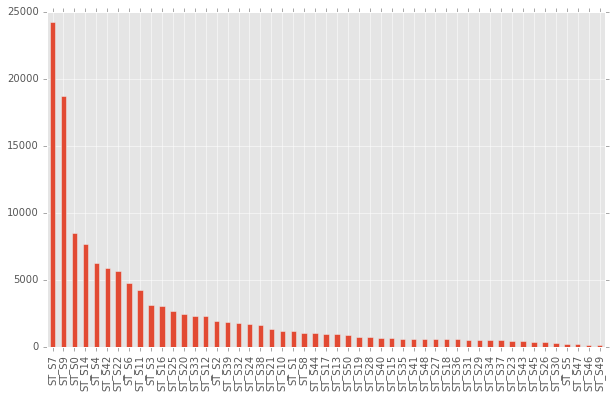

In [45]:
data2use['RTD_ST_CD'].value_counts().plot(kind='bar')

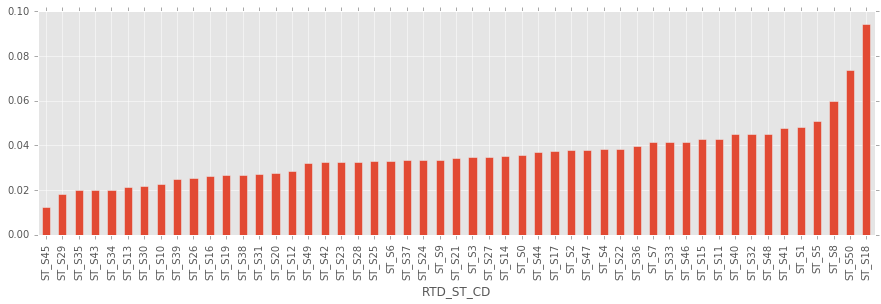

In [46]:
data = pd.concat([data2use,raw_no_duplicate_no_constant_col['Call_Flag']], axis = 1)
data.groupby("RTD_ST_CD")["Call_Flag"].mean().sort_values().plot(kind="bar", figsize=(15,4))

In [47]:
# bin the 'RTD_ST_CD' data
data = data.join(pd.cut(data.groupby("RTD_ST_CD")["Call_Flag"].mean().sort_values(), 4, 
                        labels=["0","1","2","3"]), on="RTD_ST_CD", rsuffix="_ST")
data.drop(["RTD_ST_CD"], axis=1, inplace=True)

In [48]:
data.columns

Index(['GENDER', 'MART_STATUS', 'CustomerSegment', 'PAYMENTS_3M', 'NOT_DI_3M',
       'POLICYPURCHASECHANNEL', 'CHANNEL4_3M', 'NOT_DI_6M', 'LOGINS',
       'EVENT2_90_SUM', 'CHANNEL1_6M', 'PAYMENTS_6M', 'METHOD1_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'Age', 'CHANNEL3_6M', 'RECENT_PAYMENT',
       'Tenure', 'CHANNEL2_6M', 'Call_Flag', 'Call_Flag_ST'],
      dtype='object')

In [49]:
# convert features to categorical features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
catColumns = ['CustomerSegment','MART_STATUS','GENDER','RECENT_PAYMENT','NOT_DI_3M',
              'NOT_DI_6M','Call_Flag_ST']
for col in catColumns:
    n = len(data[col].unique())
    if (n > 2):
        X = pd.get_dummies(data[col], prefix = col, drop_first=True)
    #  X = X.drop(X.columns[0], axis=1)
        data[X.columns] = X;
        data.drop(col, axis=1, inplace=True) # drop the original categorical variable (optional)

    else:
        le.fit(data2use[col])
        data[col] = le.transform(data2use[col])
data.dtypes

GENDER                     int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
POLICYPURCHASECHANNEL      int64
CHANNEL4_3M                int64
NOT_DI_6M                  int64
LOGINS                     int64
EVENT2_90_SUM              int64
CHANNEL1_6M              float64
PAYMENTS_6M              float64
METHOD1_6M               float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
Age                      float64
CHANNEL3_6M              float64
RECENT_PAYMENT             int64
Tenure                   float64
CHANNEL2_6M              float64
Call_Flag                  int64
CustomerSegment_2          uint8
CustomerSegment_3          uint8
CustomerSegment_NONE       uint8
MART_STATUS_MS_S1          uint8
MART_STATUS_MS_S2          uint8
MART_STATUS_MS_S3          uint8
MART_STATUS_MS_S4          uint8
Call_Flag_ST_1             uint8
Call_Flag_ST_2             uint8
Call_Flag_ST_3             uint8
dtype: object

In [50]:
data.to_csv('data2use.csv', index = False)

# Normalize data
Based on previous analysis, the following features will be normalized for better performance.

In [51]:

def normalize(X):
    """
    Make the distribution of the values of each variable similar 
    by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

def minmax(X):
    """
    input: array
    """
    for feature in X.columns:
        X[feature] = (X[feature] - min(X[feature]))/(max(X[feature]) - min(X[feature]))
    return X
    


In [52]:
data.columns

Index(['GENDER', 'PAYMENTS_3M', 'NOT_DI_3M', 'POLICYPURCHASECHANNEL',
       'CHANNEL4_3M', 'NOT_DI_6M', 'LOGINS', 'EVENT2_90_SUM', 'CHANNEL1_6M',
       'PAYMENTS_6M', 'METHOD1_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'Age',
       'CHANNEL3_6M', 'RECENT_PAYMENT', 'Tenure', 'CHANNEL2_6M', 'Call_Flag',
       'CustomerSegment_2', 'CustomerSegment_3', 'CustomerSegment_NONE',
       'MART_STATUS_MS_S1', 'MART_STATUS_MS_S2', 'MART_STATUS_MS_S3',
       'MART_STATUS_MS_S4', 'Call_Flag_ST_1', 'Call_Flag_ST_2',
       'Call_Flag_ST_3'],
      dtype='object')

In [69]:
l2_norm_features = ['Age','Tenure']
minmax_norm_features = ['EVENT2_90_SUM','NOT_DI_3M','NOT_DI_6M','LOGINS',
                       'PAYMENTS_3M','PAYMENTS_6M','METHOD1_6M',
                        'CHANNEL3_6M','CHANNEL4_3M','CHANNEL2_6M','CHANNEL5_6M','CHANNEL1_6M']
features_leftover = [col for col in data.columns.values if col not in l2_norm_features + minmax_norm_features]

In [70]:
df_l2_normalized = normalize(data[l2_norm_features])
df_minmax_normalized = minmax(data[minmax_norm_features])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a26a70f60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a20376358>], dtype=object)

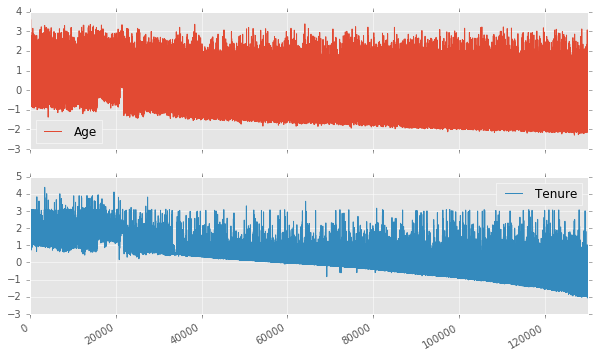

In [71]:
df_l2_normalized.plot(subplots = True)

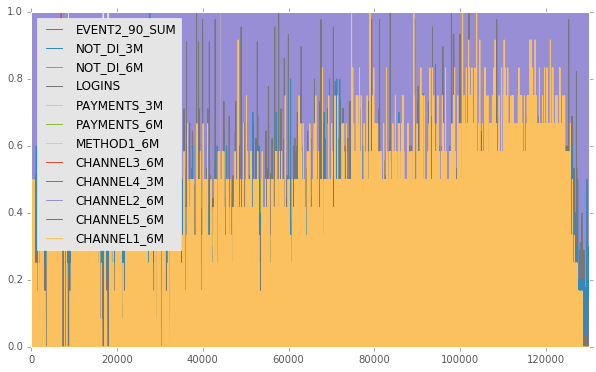

In [72]:
df_minmax_normalized.plot()

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataMinMax = pd.DataFrame(scaler.fit_transform(data), columns= data.columns.values)
dataMinMax.describe()

,GENDER,PAYMENTS_3M,NOT_DI_3M,POLICYPURCHASECHANNEL,CHANNEL4_3M,NOT_DI_6M,LOGINS,EVENT2_90_SUM,CHANNEL1_6M,PAYMENTS_6M,METHOD1_6M,CHANNEL4_6M,CHANNEL5_6M,Age,CHANNEL3_6M,RECENT_PAYMENT,Tenure,CHANNEL2_6M,Call_Flag,CustomerSegment_2,CustomerSegment_3,CustomerSegment_NONE,MART_STATUS_MS_S1,MART_STATUS_MS_S2,MART_STATUS_MS_S3,MART_STATUS_MS_S4,Call_Flag_ST_1,Call_Flag_ST_2,Call_Flag_ST_3
count,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000
mean,0.536849,0.067351,0.055985,0.131265,0.019760,0.080481,0.021160,0.048390,0.021814,0.073910,0.034528,0.022249,0.019615,0.388673,0.031249,0.105768,0.320852,0.017897,0.036326,0.195172,0.038814,0.028527,0.350925,0.447484,0.103474,0.060830,0.791502,0.014566,0.004194
std,0.498642,0.033273,0.229894,0.337691,0.060697,0.272038,0.047744,0.127336,0.091028,0.038590,0.048723,0.058922,0.056010,0.169828,0.070150,0.307542,0.155309,0.035273,0.187100,0.396335,0.193153,0.166474,0.477261,0.497236,0.304578,0.239019,0.406236,0.119808,0.064624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057692,0.000000,0.000000,0.000000,0.255970,0.000000,0.000000,0.209004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096154,0.000000,0.000000,0.000000,0.392302,0.000000,0.000000,0.317669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.096154,0.075472,0.000000,0.000000,0.509870,0.000000,0.000000,0.415974,0.018868,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from scipy.stats import multivariate_normal
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix, classification_report, f1_score
score = make_scorer(roc_auc_score)

In [75]:
# Define helper functions


def train_predict(model, X_train, y_train, X_test, y_test):
    print("Training a %s classifier using a training set size of %d"%(model.__class__.__name__, len(X_train)))
    model.fit(X_train, y_train)
    print("The AUC score for training set is %.4f"%(predict_labels(model, X_train, y_train)))
    print("The AUC score for test set is %.4f"%(predict_labels(model, X_test, y_test)))
    
def predict_labels(model, features, target):
    y_pred = model.predict(features)
    return roc_auc_score(target, y_pred)


In [76]:
# Get data ready
X = data.drop('Call_Flag', axis = 1)
y = raw_no_duplicate_no_constant_col['Call_Flag']

## Base logistic regression with upsampling and downsampling
There are many sampling methods that can be used, here I'll try simple sampling techinques from sklearn.utils. Other advanced methods like SMOTE and other things can also be tested when have more time.

#### Upsampling using resample utility

In [77]:
# Resampling method
from sklearn.utils import resample
# Separate majority and minority classes
#data = pd.concat([X,y], axis = 1)
df_majority = data[data['Call_Flag'] == 0]
df_minority = data[data['Call_Flag'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=128) # reproducible results
#
    
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Call_Flag'].value_counts()

1    124313
0    124313
Name: Call_Flag, dtype: int64

In [78]:
# Define the model
X_upsampled = df_upsampled[X.columns]
y_upsampled = df_upsampled['Call_Flag']
model_base = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    
    # Fit and predict!
    model_base.fit(X_train, y_train)
    y_pred = model_base.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))
    print("Model has a training AUC score of %.4f"%(predict_labels(model_base, X_train, y_train)))
    print('Model has a testing AUC score of %.4f'%(predict_labels(model_base, X_test, y_test)))

             precision    recall  f1-score   support

          0       0.79      0.74      0.77     37294
          1       0.76      0.80      0.78     37294

avg / total       0.77      0.77      0.77     74588

Model has a training AUC score of 0.7744
Model has a testing AUC score of 0.7733
             precision    recall  f1-score   support

          0       0.79      0.75      0.77     37294
          1       0.76      0.80      0.78     37294

avg / total       0.78      0.78      0.78     74588

Model has a training AUC score of 0.7746
Model has a testing AUC score of 0.7754
             precision    recall  f1-score   support

          0       0.79      0.75      0.77     37294
          1       0.76      0.80      0.78     37294

avg / total       0.77      0.77      0.77     74588

Model has a training AUC score of 0.7749
Model has a testing AUC score of 0.7739


#### Downsampling using resample utility

In [79]:
# Try downsampling for majority class
# Resampling method
from sklearn.utils import resample
# Separate majority and minority classes
# data = pd.concat([X,y], axis = 1)
df_majority = data[data['Call_Flag'] == 0]
df_minority = data[data['Call_Flag'] == 1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['Call_Flag'].value_counts()



1    4686
0    4686
Name: Call_Flag, dtype: int64

In [80]:

# Define the model
X_downsampled = df_downsampled[X.columns]
y_downsampled = df_downsampled['Call_Flag']
model_base = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_downsampled, y_downsampled):
    # Select the train and test data
    X_train, y_train = X_downsampled.iloc[train_indices], y_downsampled.iloc[train_indices]
    X_test, y_test = X_downsampled.iloc[test_indices], y_downsampled.iloc[test_indices]
    
    # Fit and predict!
    model_base.fit(X_train, y_train)
    y_pred = model_base.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))
    print("Model has a training AUC score of %.4f"%(predict_labels(model_base, X_train, y_train)))
    print('Model has a testing AUC score of %.4f'%(predict_labels(model_base, X_test, y_test)))


             precision    recall  f1-score   support

          0       0.79      0.75      0.77      1406
          1       0.76      0.80      0.78      1406

avg / total       0.78      0.78      0.78      2812

Model has a training AUC score of 0.7750
Model has a testing AUC score of 0.7760
             precision    recall  f1-score   support

          0       0.78      0.76      0.77      1406
          1       0.76      0.78      0.77      1406

avg / total       0.77      0.77      0.77      2812

Model has a training AUC score of 0.7752
Model has a testing AUC score of 0.7688
             precision    recall  f1-score   support

          0       0.79      0.76      0.78      1406
          1       0.77      0.80      0.78      1406

avg / total       0.78      0.78      0.78      2812

Model has a training AUC score of 0.7739
Model has a testing AUC score of 0.7792


## Logistic Regression Cross Validation Classifier

In [81]:
seed = 128
# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_downsampled, y_downsampled):
    # Select the train and test data
    X_train, y_train = X_downsampled.iloc[train_indices], y_downsampled.iloc[train_indices]
    X_test, y_test = X_downsampled.iloc[test_indices], y_downsampled.iloc[test_indices]
    searchCV = LogisticRegressionCV(Cs = [0.001,0.01,0.1,1,10,100], cv=4, scoring=score, penalty='l2', 
                                solver = 'lbfgs', random_state=seed, class_weight='balanced')
    searchCV.fit(X_train, y_train)
    print("Model has a training AUC score of %.4f"%(predict_labels(searchCV, X_train, y_train)))
    print('Model has a testing AUC score of %.4f'%(predict_labels(searchCV, X_test, y_test)))

Model has a training AUC score of 0.7758
Model has a testing AUC score of 0.7777
Model has a training AUC score of 0.7773
Model has a testing AUC score of 0.7671
Model has a training AUC score of 0.7750
Model has a testing AUC score of 0.7799


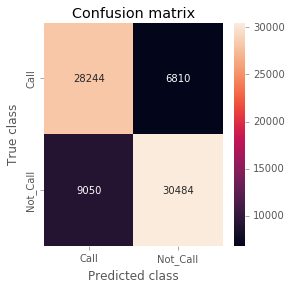

In [155]:
conf_matrx = confusion_matrix(searchCV.predict(X_test), y_test)
plt.figure(figsize = (4,4))
LABELS = ['Call','Not_Call']
sns.heatmap(conf_matrx, xticklabels = LABELS, yticklabels = LABELS,
           annot = True, fmt = 'd');
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

1. feature CHANNEL4_6M (0.946145)
2. feature RECENT_PAYMENT (-0.822793)
3. feature NOT_DI_3M (0.625021)
4. feature CustomerSegment_NONE (-0.522604)
5. feature POLICYPURCHASECHANNEL (-0.480294)
6. feature Call_Flag_ST_3 (0.441636)
7. feature PAYMENTS_6M (-0.383917)
8. feature CHANNEL1_6M (0.344841)
9. feature CHANNEL2_6M (0.327598)
10. feature Call_Flag_ST_2 (0.302192)
11. feature Call_Flag_ST_1 (0.284568)
12. feature MART_STATUS_MS_S1 (-0.216319)
13. feature MART_STATUS_MS_S2 (-0.205606)
14. feature Tenure (-0.201318)
15. feature PAYMENTS_3M (-0.185529)
16. feature CustomerSegment_3 (-0.122335)
17. feature MART_STATUS_MS_S3 (-0.111775)
18. feature CHANNEL5_6M (-0.092466)
19. feature EVENT2_90_SUM (-0.085630)
20. feature NOT_DI_6M (0.075133)
21. feature CHANNEL4_3M (0.070288)
22. feature CHANNEL3_6M (0.060577)
23. feature LOGINS (-0.057524)
24. feature CustomerSegment_2 (0.056434)
25. feature MART_STATUS_MS_S4 (-0.038873)
26. feature GENDER (-0.016033)
27. feature Age (0.002083)
28. fea

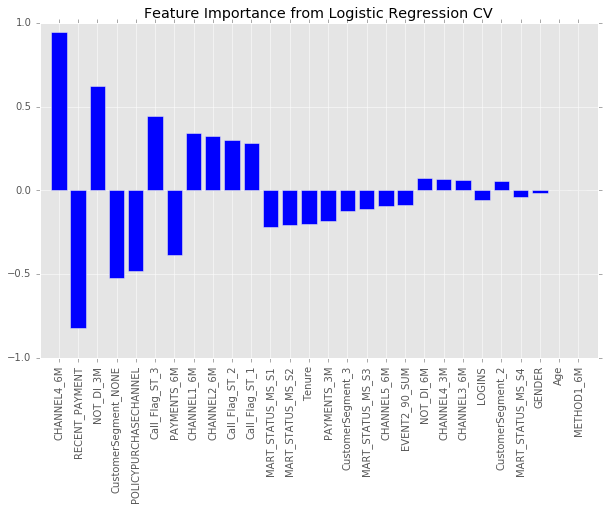

In [82]:
importances = searchCV.coef_.flatten()
indices = np.argsort(np.abs(importances))[::-1]
features = X.columns.values
#print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" %(f + 1, features[indices[f]], importances[indices[f]]))
# plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance from Logistic Regression CV")
plt.bar(range(X.shape[1]), importances[indices],
             color = 'b', align = 'center')

plt.xticks(range(X.shape[1]), features[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

    

## Random Forest Classifier

In [83]:
parameters = {'n_estimators':(10,15,20,50,100),
              'criterion':('gini','entropy'),
              'min_samples_split':(2,3,4,5),
              'min_samples_leaf':(1,2,3,4)}

model = RandomForestClassifier(random_state=128, warm_start=False, class_weight='balanced')
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
model = grid_obj.best_estimator_
print (model.get_params, sep = '\n')
print("Model has a training AUC score of %.4f"%(predict_labels(model, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(model, X_test, y_test)))


Fitting 4 folds for each of 160 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 370 tasks      | elapsed:   37.8s
[Parallel(n_jobs=4)]: Done 621 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:  1.3min finished


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=128,
            verbose=0, warm_start=False)>
Model has a training AUC score of 0.8668
Model has a testing AUC score of 0.7792


In [84]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.78      0.77      0.78      1406
          1       0.78      0.79      0.78      1406

avg / total       0.78      0.78      0.78      2812

[[1087  319]
 [ 302 1104]]


1. feature CHANNEL4_6M (0.216825)
2. feature CHANNEL4_3M (0.128145)
3. feature Tenure (0.093041)
4. feature LOGINS (0.082249)
5. feature Age (0.075293)
6. feature PAYMENTS_6M (0.062552)
7. feature CHANNEL2_6M (0.058606)
8. feature PAYMENTS_3M (0.049439)
9. feature METHOD1_6M (0.040968)
10. feature CHANNEL3_6M (0.033419)
11. feature CHANNEL5_6M (0.031878)
12. feature RECENT_PAYMENT (0.014645)
13. feature EVENT2_90_SUM (0.012175)
14. feature GENDER (0.012076)
15. feature NOT_DI_3M (0.011376)
16. feature MART_STATUS_MS_S2 (0.010738)
17. feature MART_STATUS_MS_S1 (0.009464)
18. feature CHANNEL1_6M (0.009382)
19. feature POLICYPURCHASECHANNEL (0.008851)
20. feature CustomerSegment_2 (0.008691)
21. feature Call_Flag_ST_1 (0.008687)
22. feature NOT_DI_6M (0.007627)
23. feature MART_STATUS_MS_S3 (0.004731)
24. feature MART_STATUS_MS_S4 (0.002952)
25. feature CustomerSegment_NONE (0.002545)
26. feature CustomerSegment_3 (0.002324)
27. feature Call_Flag_ST_2 (0.000998)
28. feature Call_Flag_ST_3

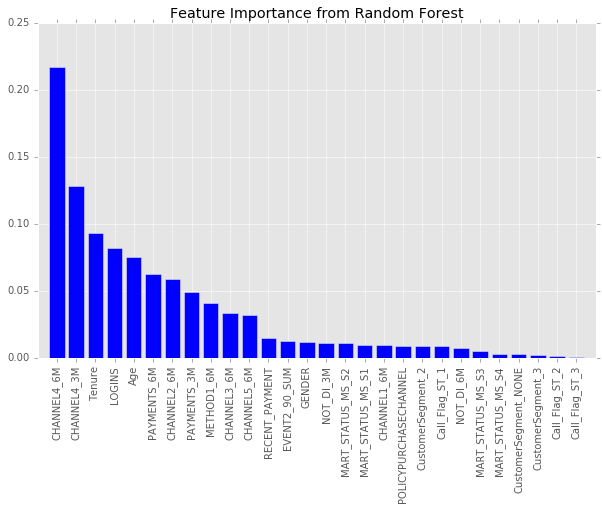

In [85]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

#print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %s (%f)"%(f + 1, features[indices[f]], importances[indices[f]]))
# plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[indices],
             color = 'b', align = 'center')
plt.xticks(range(X.shape[1]), features[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

    
    

## Gradient Boosting Classifier
Boosting pseudocode:
1. Fit a model to the data  $F_1(x) = y$
2. Fit a model to the residuals, $h_1(x) = y - F_1(x)$
3. Create a new model, $F_2(x) = F_1(x) + h_1(x)$

The idea is by inserting more models that correct the errors of the previous weak model. Specially, <br>
$$F(x) = F_1(x)-> F_2(x) = F_1(x) + h_1(x) ... -> F_M(x) = F_{M-1}(x) + h_{M-1}(x)$$

ref: http://xgboost.readthedocs.io/en/latest/model.html

In [132]:
from sklearn.cross_validation import train_test_split


parameters = {'loss':('deviance','exponential'),
              'learning_rate':(0.01,0.1,1.0),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)

model = GradientBoostingClassifier(random_state=seed, warm_start=False)
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
model = grid_obj.best_estimator_
print (model.get_params, sep = '\n')
print("Model has a training AUC score of %.4f"%(predict_labels(model, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(model, X_test, y_test)))

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed: 16.6min finished


<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=128, subsample=1.0, verbose=0,
              warm_start=False)>
Model has a training AUC score of 0.5614
Model has a testing AUC score of 0.5427


In [133]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98     24885
          1       0.43      0.09      0.15       915

avg / total       0.95      0.96      0.95     25800

[[24778   107]
 [  833    82]]


1. feature Age (0.289870)
2. feature Tenure (0.197461)
3. feature CHANNEL4_6M (0.063701)
4. feature CHANNEL3_6M (0.053748)
5. feature CHANNEL5_6M (0.046770)
6. feature PAYMENTS_6M (0.043816)
7. feature LOGINS (0.042251)
8. feature CHANNEL2_6M (0.035305)
9. feature CHANNEL1_6M (0.034691)
10. feature METHOD1_6M (0.029938)
11. feature CHANNEL4_3M (0.026868)
12. feature EVENT2_90_SUM (0.026102)
13. feature PAYMENTS_3M (0.025725)
14. feature POLICYPURCHASECHANNEL (0.012770)
15. feature NOT_DI_3M (0.010824)
16. feature GENDER (0.008972)
17. feature MART_STATUS_MS_S1 (0.008560)
18. feature RECENT_PAYMENT (0.007614)
19. feature MART_STATUS_MS_S4 (0.006946)
20. feature CustomerSegment_NONE (0.006292)
21. feature Call_Flag_ST_1 (0.005609)
22. feature MART_STATUS_MS_S2 (0.005145)
23. feature Call_Flag_ST_3 (0.003840)
24. feature CustomerSegment_2 (0.003460)
25. feature Call_Flag_ST_2 (0.002067)
26. feature CustomerSegment_3 (0.001396)
27. feature NOT_DI_6M (0.000258)
28. feature MART_STATUS_MS_S3

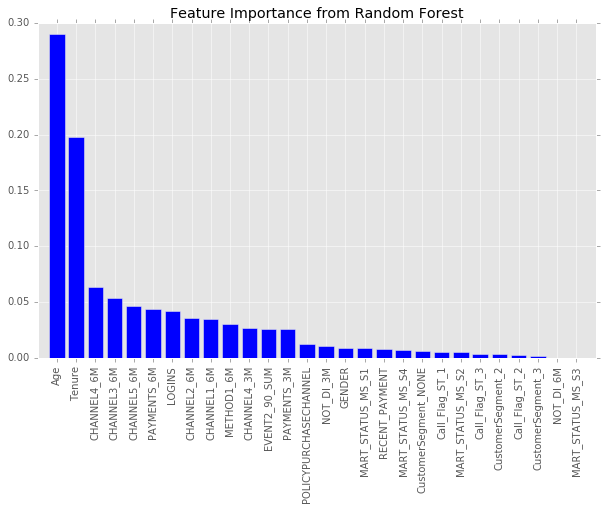

In [134]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

#print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %s (%f)"%(f + 1, features[indices[f]], importances[indices[f]]))
# plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[indices],
             color = 'b', align = 'center')
plt.xticks(range(X.shape[1]), features[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


# XGBoost
Test and tune XGBoost hopefully better performance.Both xgboost and gbm follows the principle of gradient boosting. There are however, the difference in modeling details. Specifically, xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost. For model, it might be more suitable to be called as regularized gradient boosting.

Advantages for XGBoost:
1. Paralle Processing
2. High flexibility
3. Out of box routine for handling missing data
4. Tree pruning ( GBM is more of a greddy allgorithm but XGBoost make splits upto the max_depth then start pruning backwards
5. Build-in cross-validation
6. Contunue on existing model (hot start)
7. tree_method = hist for converting contunuous variable to buckets

ref: http://xgboost.readthedocs.io/en/latest/model.html

In [114]:
len(noCalls)/len(calls)

26.528595817328213

Start XGBoost Training
[0]	train-auc:0.839713	valid-auc:0.832166
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[5]	train-auc:0.87233	valid-auc:0.862358
[10]	train-auc:0.879713	valid-auc:0.866215
[15]	train-auc:0.885577	valid-auc:0.867212
[20]	train-auc:0.88952	valid-auc:0.86829
[25]	train-auc:0.893125	valid-auc:0.868205
[30]	train-auc:0.896343	valid-auc:0.868286
[35]	train-auc:0.8989	valid-auc:0.86806
[40]	train-auc:0.902294	valid-auc:0.867145
[45]	train-auc:0.904195	valid-auc:0.866246
[50]	train-auc:0.906765	valid-auc:0.865952
Stopping. Best iteration:
[28]	train-auc:0.895091	valid-auc:0.868711

[3.2708210945129395] Finish XGBoost Training


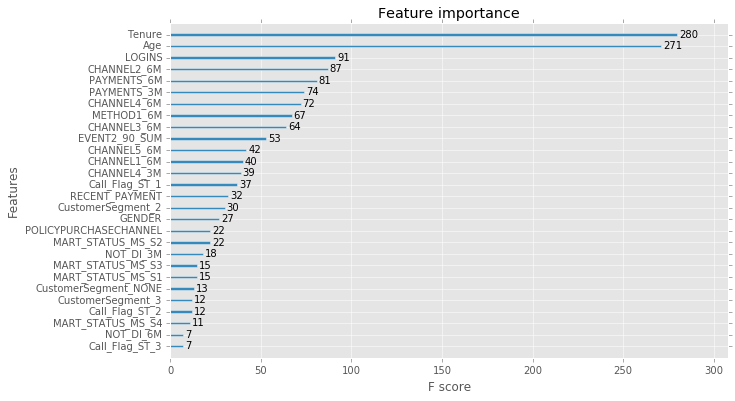

In [130]:
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from xgboost import plot_importance
start_time = time.time()
print("Start XGBoost Training")

param_grid_test = {
    'max_depth': range(1,10,2),
    'min_child_weight': range(0,6,2)
}
# Set the params(changed this params from Pranav kernel) for xgboost model
params = {'objective':'binary:logistic',
          'eta': 0.3,  # analogous to learning rate in GBM
          'tree_method': "hist",
          'grow_policy': "lossguide",
          'max_leaves': 256,  # =2^n depth
          'max_depth': 5, # typical 3-10 , 5 chosen based on testing
          'subsample': 0.8, # lower value prevents overfitting
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'min_child_weight':0,  # different than 'min_child_leaf' in GBM
          'alpha':4,
          'lambda':10,  # add L2 regullarization for prevent overfitting
          'scale_pos_weight': 27,
          'objective': 'binary:logistic', 
          'eval_metric': 'auc', 
          'nthread':8,
          'random_state': 99, 
          'silent': True}

x1, x2, y1, y2 = train_test_split(X, y, test_size=0.2, random_state=128)
dtrain = xgb.DMatrix(x1, y1)
dvalid = xgb.DMatrix(x2, y2)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
xgb_model = xgb.train(params, xgb.DMatrix(x1, y1), 200, watchlist, 
                  maximize=True, early_stopping_rounds = 25, verbose_eval=5)
#gsearch = GridSearchCV(estimator= model)
del dvalid   
print('[{}] Finish XGBoost Training'.format(time.time() - start_time))
# Plot the feature importance from xgboost
plot_importance(xgb_model)
plt.gcf().savefig('feature_importance_xgb.png')

Start XGBoost Training
[0]	train-auc:0.801906	valid-auc:0.800794
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[5]	train-auc:0.862626	valid-auc:0.860491
[10]	train-auc:0.875853	valid-auc:0.873437
[15]	train-auc:0.882434	valid-auc:0.880107
[20]	train-auc:0.886069	valid-auc:0.883563
[25]	train-auc:0.889529	valid-auc:0.886851
[30]	train-auc:0.892776	valid-auc:0.88987
[35]	train-auc:0.895625	valid-auc:0.892543
[40]	train-auc:0.897449	valid-auc:0.894305
[45]	train-auc:0.899577	valid-auc:0.896231
[50]	train-auc:0.902002	valid-auc:0.898334
[55]	train-auc:0.904988	valid-auc:0.900913
[60]	train-auc:0.906557	valid-auc:0.902407
[65]	train-auc:0.908264	valid-auc:0.903796
[70]	train-auc:0.909634	valid-auc:0.905045
[75]	train-auc:0.910826	valid-auc:0.906299
[80]	train-auc:0.912597	valid-auc:0.907896
[85]	train-auc:0.914443	valid-auc:0.90991
[90]	train-auc:0.915763	valid-auc:0.911043
[95]	train-auc:0.9169

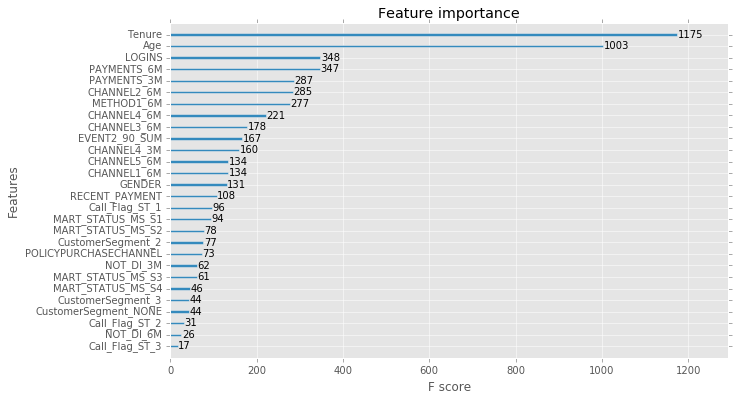

In [135]:
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from xgboost import plot_importance
start_time = time.time()
print("Start XGBoost Training")

param_grid_test = {
    'max_depth': range(1,10,2),
    'min_child_weight': range(0,6,2)
}
# Set the params(changed this params from Pranav kernel) for xgboost model
params = {'objective':'binary:logistic',
          'eta': 0.3,  # analogous to learning rate in GBM
          'tree_method': "hist",
          'grow_policy': "lossguide",
          'max_leaves': 256,  # =2^n depth
          'max_depth': 5, # typical 3-10 , 5 chosen based on testing
          'subsample': 0.8, # lower value prevents overfitting
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'min_child_weight':0,  # different than 'min_child_leaf' in GBM
          'alpha':4,
          'lambda':10,  # add L2 regullarization for prevent overfitting
          'scale_pos_weight': 27,
          'objective': 'binary:logistic', 
          'eval_metric': 'auc', 
          'nthread':8,
          'random_state': 99, 
          'silent': True}

x1, x2, y1, y2 = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=128)
dtrain = xgb.DMatrix(x1, y1)
dvalid = xgb.DMatrix(x2, y2)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
xgb_model = xgb.train(params, xgb.DMatrix(x1, y1), 200, watchlist, 
                  maximize=True, early_stopping_rounds = 25, verbose_eval=5)
#gsearch = GridSearchCV(estimator= model)
del dvalid   
print('[{}] Finish XGBoost Training'.format(time.time() - start_time))
# Plot the feature importance from xgboost
plot_importance(xgb_model)
plt.gcf().savefig('feature_importance_xgb_normalized.png')

# Naive Bayes Classifier

In [88]:
# Since the dataset is not large and some transformation done to convert features to normal distribution. 
#Let's try Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.1)

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_train, y_train):
    # Select the train and test data
    X_train_small, y_train_small = X_train.iloc[train_indices], y_train.iloc[train_indices]
    X_val, y_val = X_train.iloc[test_indices], y_train.iloc[test_indices]
    

    # Fit and predict!
    clf.fit(X_train_small, y_train_small)
    y_pred = clf.predict(X_val)
    
    # And finally: show the results
    print(classification_report(y_val, y_pred))
    print("Model has a training AUC score of %.4f"%(predict_labels(clf, X_train, y_train)))
    print('Model has a testing AUC score of %.4f'%(predict_labels(clf, X_test, y_test)))

             precision    recall  f1-score   support

          0       0.71      0.81      0.76       984
          1       0.78      0.67      0.72       984

avg / total       0.74      0.74      0.74      1968

Model has a training AUC score of 0.7562
Model has a testing AUC score of 0.7568
             precision    recall  f1-score   support

          0       0.73      0.80      0.76       984
          1       0.78      0.70      0.74       984

avg / total       0.75      0.75      0.75      1968

Model has a training AUC score of 0.7569
Model has a testing AUC score of 0.7592
             precision    recall  f1-score   support

          0       0.72      0.82      0.77       984
          1       0.79      0.68      0.73       984

avg / total       0.75      0.75      0.75      1968

Model has a training AUC score of 0.7515
Model has a testing AUC score of 0.7518


In [89]:
print(classification_report(y_test, clf.predict(X_test)))
print('Model has a testing AUC score of %.4f'%(predict_labels(clf, X_test, y_test)))

             precision    recall  f1-score   support

          0       0.73      0.80      0.76      1406
          1       0.78      0.70      0.74      1406

avg / total       0.75      0.75      0.75      2812

Model has a testing AUC score of 0.7518


# Neural network


In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
# also tried different solver
nn = MLPClassifier(hidden_layer_sizes = (15,),solver = 'sgd', activation = 'logistic',
                   alpha = 0.1, learning_rate = 'adaptive')
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
scaler = StandardScaler()
#X = scaler.fit_transform(train[data2use.columns.values])
#y = train['Call_Flag']

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    # Normalize the data, it doesn't help much
    # X_train = normalize(X_train)
    # X_test = normalize(X_test)
    
    # Fit and predict!
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.79      0.77      0.78     37294
          1       0.77      0.80      0.79     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.78      0.77      0.78     37294
          1       0.78      0.79      0.78     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.77      0.78     37294
          1       0.78      0.79      0.78     37294

avg / total       0.78      0.78      0.78     74588



## Deep neural net
Tried couple deep net combination and the results reduces when the number of layer increase. Three layer neural net significantly reduced the model performance. Two layer neural network with set up of (20,10) works ok.

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

nn = MLPClassifier(hidden_layer_sizes = (20,10),solver = 'sgd', activation = 'logistic',
                   alpha = 0.1, learning_rate = 'adaptive')
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
scaler = StandardScaler()
#X = scaler.fit_transform(train[data2use.columns.values])
#y = train['Call_Flag']

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    # Normalize the data
    #  X_train = normalize(X_train)
    #  X_test = normalize(X_test)
    
    # Fit and predict!
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.79      0.76      0.78     37294
          1       0.77      0.80      0.79     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.77      0.78     37294
          1       0.78      0.79      0.79     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.77      0.78     37294
          1       0.78      0.80      0.79     37294

avg / total       0.78      0.78      0.78     74588



In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

nn = MLPClassifier(hidden_layer_sizes = (20,10,2),solver = 'sgd', activation = 'logistic',
                   alpha = 0.1, learning_rate = 'adaptive')
scaler = StandardScaler()
#X = scaler.fit_transform(train[data2use.columns.values])
#y = train['Call_Flag']

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    # Normalize the data
    #  X_train = normalize(X_train)
    #  X_test = normalize(X_test)
    
    # Fit and predict!
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.51      0.99      0.67     37294
          1       0.88      0.04      0.08     37294

avg / total       0.69      0.52      0.38     74588

             precision    recall  f1-score   support

          0       0.58      0.57      0.58     37294
          1       0.58      0.59      0.59     37294

avg / total       0.58      0.58      0.58     74588

             precision    recall  f1-score   support

          0       0.54      0.79      0.64     37294
          1       0.60      0.31      0.41     37294

avg / total       0.57      0.55      0.53     74588



# Try different over sampling method

In [137]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.naive_bayes import MultinomialNB

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_sample(X,y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

X_res = pd.DataFrame(X_res, columns= X.columns.values)
y_res = pd.DataFrame(y_res, columns = ['Call_Flag'])

clf = MultinomialNB(alpha = 0.1)
# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_res, y_res):
    # Select the train and test data
    X_train, y_train = X_res.iloc[train_indices], y_res.iloc[train_indices]
    X_test, y_test = X_res.iloc[test_indices], y_res.iloc[test_indices]
 
    # Fit and predict!
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))
    print('Model has a testing AUC score of %.4f'%(predict_labels(clf, X_train, y_train)))
    print('Model has a testing AUC score of %.4f'%(predict_labels(clf, X_test, y_test)))

Resampled dataset shape Counter({0: 124313, 1: 124313})
             precision    recall  f1-score   support

          0       0.78      0.78      0.78     37294
          1       0.78      0.78      0.78     37294

avg / total       0.78      0.78      0.78     74588

Model has a testing AUC score of 0.7780
Model has a testing AUC score of 0.7767
             precision    recall  f1-score   support

          0       0.78      0.78      0.78     37294
          1       0.78      0.78      0.78     37294

avg / total       0.78      0.78      0.78     74588

Model has a testing AUC score of 0.7771
Model has a testing AUC score of 0.7785
             precision    recall  f1-score   support

          0       0.78      0.78      0.78     37294
          1       0.78      0.78      0.78     37294

avg / total       0.78      0.78      0.78     74588

Model has a testing AUC score of 0.7776
Model has a testing AUC score of 0.7771


Start XGBoost Training
[0]	train-auc:0.826368	valid-auc:0.825731
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[5]	train-auc:0.935694	valid-auc:0.935404
[10]	train-auc:0.962194	valid-auc:0.961464
[15]	train-auc:0.976865	valid-auc:0.976542
[20]	train-auc:0.984589	valid-auc:0.98409
[25]	train-auc:0.988108	valid-auc:0.987643
[30]	train-auc:0.990137	valid-auc:0.989707
[35]	train-auc:0.991208	valid-auc:0.990719
[40]	train-auc:0.992112	valid-auc:0.991531
[45]	train-auc:0.992661	valid-auc:0.991954
[50]	train-auc:0.993123	valid-auc:0.992312
[55]	train-auc:0.993406	valid-auc:0.992496
[60]	train-auc:0.993676	valid-auc:0.992669
[65]	train-auc:0.993979	valid-auc:0.992851
[70]	train-auc:0.994174	valid-auc:0.992961
[75]	train-auc:0.994419	valid-auc:0.993155
[80]	train-auc:0.994593	valid-auc:0.993275
[85]	train-auc:0.994724	valid-auc:0.993357
[90]	train-auc:0.994856	valid-auc:0.993422
[95]	train-auc:0.994

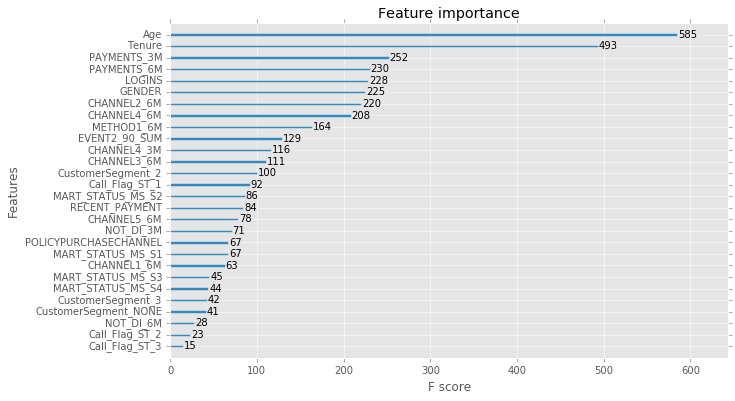

In [138]:
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from xgboost import plot_importance
start_time = time.time()
print("Start XGBoost Training")

param_grid_test = {
    'max_depth': range(1,10,2),
    'min_child_weight': range(0,6,2)
}
# Set the params(changed this params from Pranav kernel) for xgboost model
params = {'objective':'binary:logistic',
          'eta': 0.3,  # analogous to learning rate in GBM
          'tree_method': "hist",
          'grow_policy': "lossguide",
          'max_leaves': 256,  # =2^n depth
          'max_depth': 5, # typical 3-10 , 5 chosen based on testing
          'subsample': 0.8, # lower value prevents overfitting
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'min_child_weight':0,  # different than 'min_child_leaf' in GBM
          'alpha':4,
          'lambda':10,  # add L2 regullarization for prevent overfitting
          'scale_pos_weight': 27,
          'objective': 'binary:logistic', 
          'eval_metric': 'auc', 
          'nthread':8,
          'random_state': 99, 
          'silent': True}

x1, x2, y1, y2 = train_test_split(X_res, y_res, test_size=0.2, random_state=128)
dtrain = xgb.DMatrix(x1, y1)
dvalid = xgb.DMatrix(x2, y2)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
xgb_model = xgb.train(params, xgb.DMatrix(x1, y1), 200, watchlist, 
                  maximize=True, early_stopping_rounds = 25, verbose_eval=5)
#gsearch = GridSearchCV(estimator= model)
del dvalid   
print('[{}] Finish XGBoost Training'.format(time.time() - start_time))
# Plot the feature importance from xgboost
plot_importance(xgb_model)
plt.gcf().savefig('feature_importance_xgb_SMOTE.png')

### Verify the model performance by looking at the confusion matrix. 

In [150]:
y_pred = xgb_model.predict(xgb.DMatrix(x2))
print(classification_report(y2, np.round(y_pred)))
print('Model has a testing AUC score of %.4f'%(predict_labels(xgb_model, xgb.DMatrix(x1), y1)))
print('Model has a testing AUC score of %.4f'%(predict_labels(xgb_model, xgb.DMatrix(x2), y2)))

             precision    recall  f1-score   support

          0       0.99      0.77      0.86     24779
          1       0.81      0.99      0.89     24947

avg / total       0.90      0.88      0.88     49726

Model has a testing AUC score of 0.9961
Model has a testing AUC score of 0.9936


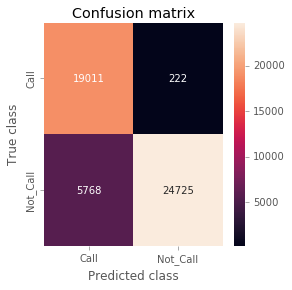

In [157]:
conf_matrx = confusion_matrix(np.round(xgb_model.predict(xgb.DMatrix(x2))), y2)
plt.figure(figsize = (4,4))
LABELS = ['Call','Not_Call']
sns.heatmap(conf_matrx, xticklabels = LABELS, yticklabels = LABELS,
           annot = True, fmt = 'd');
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

# Use Normalized data for logistic regression

In [94]:
# Try downsampling for majority class
# Resampling method
from sklearn.utils import resample
# Separate majority and minority classes

df_majority = dataMinMax[dataMinMax['Call_Flag'] == 0]
df_minority = dataMinMax[dataMinMax['Call_Flag'] == 1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['Call_Flag'].value_counts()

1.0    4686
0.0    4686
Name: Call_Flag, dtype: int64

In [95]:
seed = 128
# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_downsampled, y_downsampled):
    # Select the train and test data
    X_train, y_train = X_downsampled.iloc[train_indices], y_downsampled.iloc[train_indices]
    X_test, y_test = X_downsampled.iloc[test_indices], y_downsampled.iloc[test_indices]
    searchCV = LogisticRegressionCV(Cs = [0.001,0.01,0.1,1,10,100], cv=4, scoring=score, penalty='l2', 
                                solver = 'lbfgs', random_state=seed, class_weight='balanced')
    searchCV.fit(X_train, y_train)
    print("Model has a training AUC score of %.4f"%(predict_labels(searchCV, X_train, y_train)))
    print('Model has a testing AUC score of %.4f'%(predict_labels(searchCV, X_test, y_test)))

Model has a training AUC score of 0.7758
Model has a testing AUC score of 0.7777
Model has a training AUC score of 0.7773
Model has a testing AUC score of 0.7671
Model has a training AUC score of 0.7750
Model has a testing AUC score of 0.7799


1. feature CHANNEL4_6M (0.946145)
2. feature RECENT_PAYMENT (-0.822793)
3. feature NOT_DI_3M (0.625021)
4. feature CustomerSegment_NONE (-0.522604)
5. feature POLICYPURCHASECHANNEL (-0.480294)
6. feature Call_Flag_ST_3 (0.441636)
7. feature PAYMENTS_6M (-0.383917)
8. feature CHANNEL1_6M (0.344841)
9. feature CHANNEL2_6M (0.327598)
10. feature Call_Flag_ST_2 (0.302192)
11. feature Call_Flag_ST_1 (0.284568)
12. feature MART_STATUS_MS_S1 (-0.216319)
13. feature MART_STATUS_MS_S2 (-0.205606)
14. feature Tenure (-0.201318)
15. feature PAYMENTS_3M (-0.185529)
16. feature CustomerSegment_3 (-0.122335)
17. feature MART_STATUS_MS_S3 (-0.111775)
18. feature CHANNEL5_6M (-0.092466)
19. feature EVENT2_90_SUM (-0.085630)
20. feature NOT_DI_6M (0.075133)
21. feature CHANNEL4_3M (0.070288)
22. feature CHANNEL3_6M (0.060577)
23. feature LOGINS (-0.057524)
24. feature CustomerSegment_2 (0.056434)
25. feature MART_STATUS_MS_S4 (-0.038873)
26. feature GENDER (-0.016033)
27. feature Age (0.002083)
28. fea

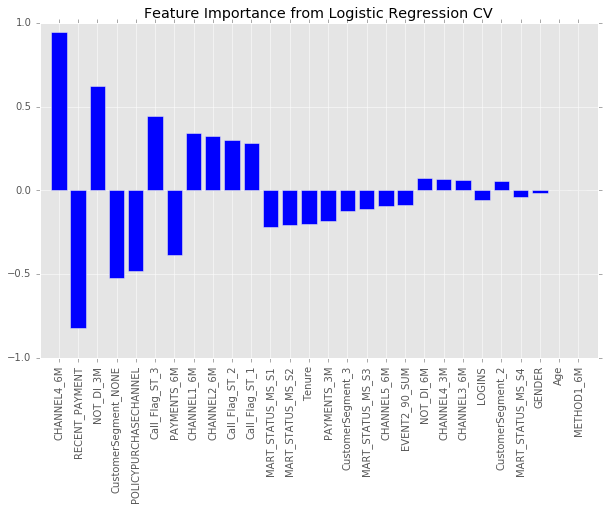

In [96]:
importances = searchCV.coef_.flatten()
indices = np.argsort(np.abs(importances))[::-1]
features = X.columns.values
#print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" %(f + 1, features[indices[f]], importances[indices[f]]))
# plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance from Logistic Regression CV")
plt.bar(range(X.shape[1]), importances[indices],
             color = 'b', align = 'center')

plt.xticks(range(X.shape[1]), features[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

    

# Outlier detection method
* Multivariate Gaussian
* SVC
* K-nearest neighbor


In [97]:
parameters = {'n_neighbors':(5,10,15,20),
              'weights':('uniform','distance'),
              'p':(1,2)}

model = KNeighborsClassifier()
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
model = grid_obj.best_estimator_
print (model.get_params, sep='\n')
print("Model has a training AUC score of %.4f"%(predict_labels(model, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(model, X_test, y_test)))

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:   11.5s finished


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
           weights='uniform')>
Model has a training AUC score of 0.7851
Model has a testing AUC score of 0.7603


In [98]:
# Resampling method
from sklearn.utils import resample
# Separate majority and minority classes
#data = pd.concat([X,y], axis = 1)
df_majority = dataMinMax[dataMinMax['Call_Flag'] == 0]
df_minority = dataMinMax[dataMinMax['Call_Flag'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=128) # reproducible results
#
    
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Call_Flag'].value_counts()

1.0    124313
0.0    124313
Name: Call_Flag, dtype: int64

In [99]:
X_downsampled = df_downsampled[X.columns]
y_downsampled = df_downsampled['Call_Flag']

In [100]:
from sklearn.svm import SVC

clf = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=2000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = minmax(X_train)
    X_test = minmax(X_test)
    
    # Fit and predict!
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.35      0.51     37294
          1       0.03      0.61      0.06      1406

avg / total       0.93      0.36      0.49     38700

             precision    recall  f1-score   support

          0       0.96      0.31      0.47     37294
          1       0.04      0.67      0.07      1406

avg / total       0.93      0.33      0.46     38700

             precision    recall  f1-score   support

          0       0.96      0.26      0.41     37294
          1       0.03      0.71      0.07      1406

avg / total       0.93      0.27      0.39     38700



In [101]:
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_train,mu,sigma)

p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
outliers = np.asarray(np.where(p < ep))


NameError: name 'cv_data' is not defined